In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

from PIL import Image

In [15]:
# Open the image and show it in grayscale mode

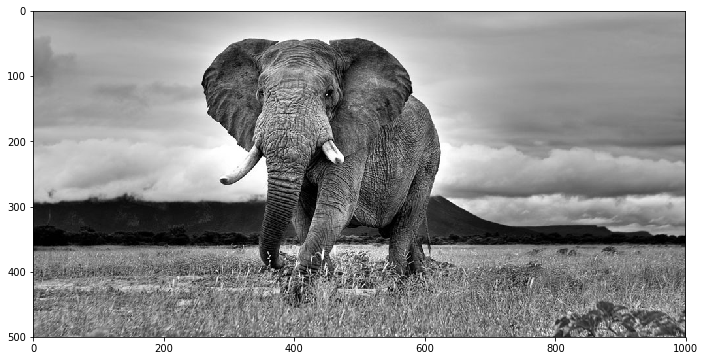

In [16]:
img = Image.open('test_image.jpg')

imggray = img.convert('LA')
plt.figure(figsize=(12, 6))
plt.imshow(imggray);

In [17]:
# Convert image to the numpy matrix and print it in the grayscale mode

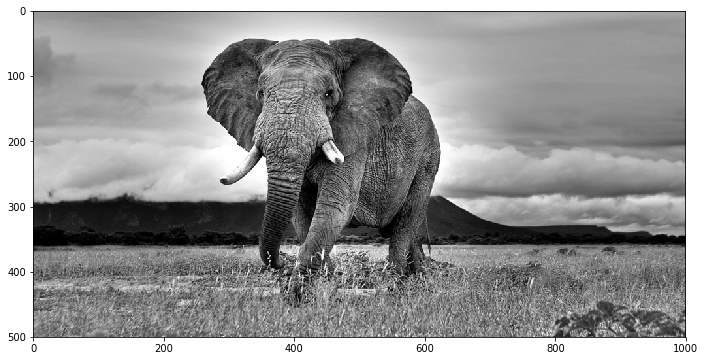

In [18]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)


plt.figure(figsize=(12,6))
plt.imshow(imgmat, cmap='gray');

In [19]:
# Compute SVD

In [20]:
import svd_algo.svd as svd

U, sigma, V = svd.svd(np.array(imgmat))
V = V.T

/home/andrew/ImageCompression/svd_algo/svd.py:32: ComplexWarning: Casting complex values to real discards the imaginary part
  U[i] = vector


In [21]:
# Compress the image by taking first (n) columns of V, rows of U and (n) elements from sigma

/home/andrew/anaconda3/lib/python3.6/site-packages/numpy/matrixlib/defmatrix.py:219: ComplexWarning: Casting complex values to real discards the imaginary part
  return data.astype(dtype)


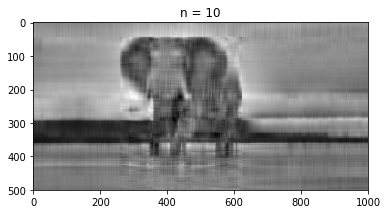

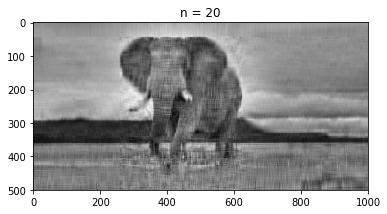

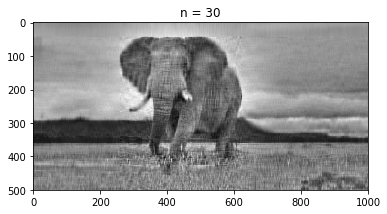

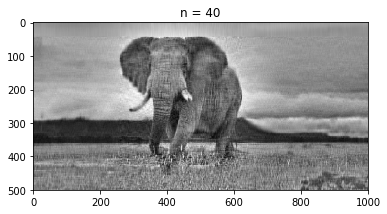

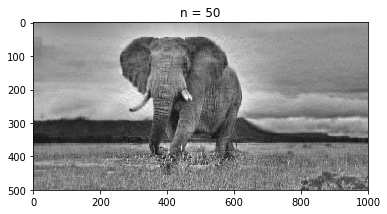

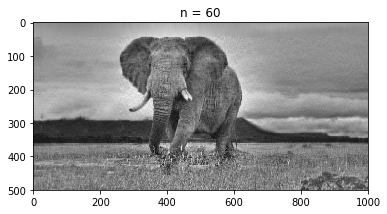

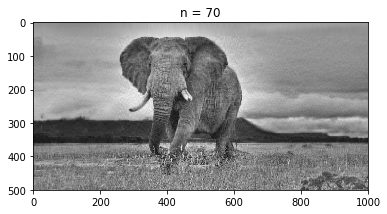

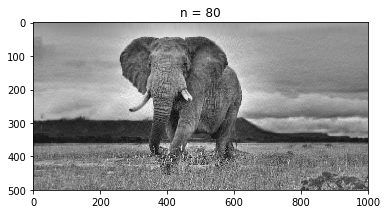

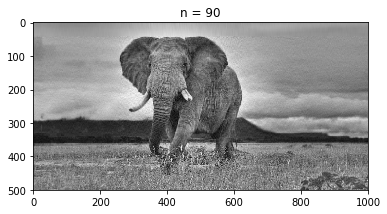

In [22]:
for i in range(10, 100, 10):
    a = np.matrix(U[:, :i])
    b = sigma[:i]
    b = b[:i, :i]
    c = np.matrix(V[:i, :])
    
    reconstimg = np.matrix(a * b * c, dtype='float64')

    plt.imshow(reconstimg, cmap='gray');
    title = "n = %s" % i
    plt.title(title)
    plt.show()